In [9]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 97kB/s 
     |████████████████████████████████| 491kB 44.4MB/s 
     |████████████████████████████████| 3.2MB 25.7MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


In [1]:
import numpy as np
import cv2
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras import backend as k
# import the necessary packages for nueral network
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import add
from math import hypot,sqrt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


370 440 439
0.6428479969630512 98.82214728745159


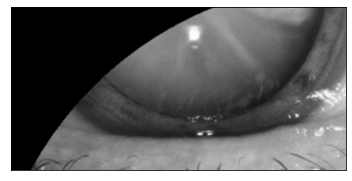

In [34]:
root_path="/content/drive/My Drive/datasets/cataract dataset/training/cataract/"
file=os.path.join(root_path,'eyeimage100.jpg')
imgR = cv2.imread(file,1)
# print(imgR)
img = cv2.cvtColor( imgR, cv2.COLOR_BGR2GRAY)
# Median Blur at 3
img = cv2.medianBlur(img,3)
# Hough Transformation and numpy array circular function tracing
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=50,minRadius=30,maxRadius=0)
if circles is not None:
	circles = np.uint16(np.around(circles))
	x, y, r = circles[0,:][0]   # Coordinates and Rad
	rows, cols = img.shape
	xr=x
	yr=y
	print (x,y,r)
	# Brightness++
	hsv = cv2.cvtColor( imgR, cv2.COLOR_BGR2HSV)
	h,s,v = cv2.split(hsv)
	v += 250
	final_hsv = cv2.merge ((h,s,v))
	imgR = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
	img = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
	# Crop And Shift Origin : FAILED
	img = img[ y-int(r/2) : y+int(r/2) , x-int(r/2) : x+int(r/2)]
	y = r
	x = r
	rows, cols = img.shape
	# Removing Whitespace
	for i in range(cols):
		for j in range(rows):
			if hypot(i-x, j-y) > r:
				img[j,i] = 0
	cv2.imwrite("iris.jpg",img)
	img=img[30:2*r-30,30:2*r-30]
	y=r-30
	x=r-30
	#img2 = cv2.threshold(img2 , 15 , 125, cv2.THRESH_BINARY)
	circles1 = cv2.HoughCircles(img ,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=50,minRadius=0,maxRadius=0)
	circles1 = np.uint16(np.around(circles1))
	#circles2 = cv2.HoughCircles(img2 ,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=50,minRadius=1,maxRadius=0)
	#circles2 = np.uint16(np.around(circles2))
	x2, y2, r2 = circles1[0,:][0]
	rows2, cols2,__ = imgR.shape
	xn=x2+30+xr-r
	yn=y2+30+yr-r
	# print x2,y2,r2
	npixels=0
	intensitySum=0
	bgrList=[]
	for i in range(cols2):
		for j in range(rows2):
			if hypot(i-xn, j-yn) < r2:
				npixels+=1
				b=imgR[j,i][0]
				g=imgR[j,i][1]
				r=imgR[j,i][2]
				#calculate intensity
				intensitySum+=b
				intensitySum+=g
				intensitySum+=r
				# #calculate unformity

				#caculate deviation
				bgrList.append(b)
				bgrList.append(g)
				bgrList.append(r)

	intensity = (intensitySum*1.0)/(3.0*npixels)
	devSum=0
	for f in bgrList:
		devSum+=(f-intensity)*(f-intensity)
	devSum=sqrt(devSum)
	devSum=devSum*1.0/(81*sqrt(((2*r2)*(2*r2))-1))
	print( devSum,intensity)
else:
	print("No circle found in image")
#plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
epochs=50
batch_size=3
root_path="/content/drive/My Drive/datasets/cataract dataset/"
train_path=os.path.join(root_path,"training")
validate_path=os.path.join(root_path,"testing")

train_gen = ImageDataGenerator(
     rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
     featurewise_center=True,
     featurewise_std_normalization=True,
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
    horizontal_flip=True
    )
test_gen=ImageDataGenerator(rescale=1./255)
validate_gen=ImageDataGenerator(
     rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
     featurewise_center=True,
     featurewise_std_normalization=True,
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
    horizontal_flip=True
    )
train_generator = train_gen.flow_from_directory(
         train_path,
         target_size=(28,28),
         batch_size=20,
      class_mode='categorical')
validate_generator = train_gen.flow_from_directory(
         validate_path,
         target_size=(28,28),
         batch_size=20,
      class_mode='categorical')


Found 340 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [4]:
# Nueral network 
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2))

In [5]:
print(model.summary())
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])
model.fit(train_generator,epochs=epochs,verbose=1,shuffle=True,validation_data=validate_generator)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)               

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


17/17 [==============================] - 105s 6s/step - loss: 0.3468 - acc: 0.4500 - val_loss: 0.2598 - val_acc: 0.4545
Epoch 2/50
17/17 [==============================] - 2s 136ms/step - loss: 0.2552 - acc: 0.5529 - val_loss: 0.2530 - val_acc: 0.5818
Epoch 3/50
17/17 [==============================] - 2s 136ms/step - loss: 0.2460 - acc: 0.6324 - val_loss: 0.2480 - val_acc: 0.5636
Epoch 4/50
17/17 [==============================] - 2s 138ms/step - loss: 0.2385 - acc: 0.7324 - val_loss: 0.2481 - val_acc: 0.5818
Epoch 5/50
17/17 [==============================] - 2s 137ms/step - loss: 0.2358 - acc: 0.7529 - val_loss: 0.2502 - val_acc: 0.5273
Epoch 6/50
17/17 [==============================] - 2s 141ms/step - loss: 0.2261 - acc: 0.7941 - val_loss: 0.2441 - val_acc: 0.6000
Epoch 7/50
17/17 [==============================] - 2s 142ms/step - loss: 0.2193 - acc: 0.8324 - val_loss: 0.2408 - val_acc: 0.5818
Epoch 8/50
17/17 [==============================] - 2s 135ms/step - loss: 0.2146 - acc: 

In [6]:
model.summary()
model.save('/content/drive/My Drive/model.h5')
from keras.models import load_model
# load model
model2 = load_model('/content/drive/My Drive/model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)               

In [15]:
predIx=model2.predict_generator(validate_generator,steps=3,verbose=1,use_multiprocessing=True)
predIdx = np.argmax(predIx, axis=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3/3 [==============================] - 0s 87ms/step


In [23]:
print(classification_report(validate_generator.classes, predIdx,
	target_names=validate_generator.class_indices.keys()))

              precision    recall  f1-score   support

    cataract       0.49      0.86      0.62        29
non cataract       0.00      0.00      0.00        26

    accuracy                           0.45        55
   macro avg       0.25      0.43      0.31        55
weighted avg       0.26      0.45      0.33        55

